**PIA - PASAJEROS METRORREY**

*Estadística Aplicada: Grupo 051*

*Equipo ERLI:*

Jessica Lizeth Hernández Bracho 1842553

Erika Denisse Cardona Padilla 1888872

>***INTRODUCCIÓN***

Base de datos sobre los pasajeros de metrorrey, se tiene un periodo mensual de los años 1995 - 2022 en donde en este año se cuentan con los dos primeros meses. 

En cada periodo se encuentra la cantidad en miles de personas que utilizan el transporte público metrorrey.

In [1]:
import numpy as np
import pandas as pd 
import scipy.stats as stats
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima.model import ARIMA

import warnings 
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
pasajeros = pd.read_csv('https://raw.githubusercontent.com/Jessica1842553/Tareas_EstadisticaAplicada_13/main/datos/DATOS-METRO.csv?token=GHSAT0AAAAAABUMYDRHRIZNKXURT2HMRTWEYUMJYEA', index_col='periodo mensual',parse_dates=True)

In [3]:
pasajeros.dropna(inplace = True)

In [4]:
pasajeros.head()

,miles de pasajeros
periodo mensual,
1995-01-01,3439.0
1995-02-01,2879.0
1995-03-01,3103.0
1995-04-01,3491.0
1995-05-01,3109.0


In [5]:
print('Rango de fechas:', min(pasajeros.index.date), '-', max(pasajeros.index.date))
print('Numero de observaciones:', pasajeros.shape[0])
print(f'Media: {pasajeros["miles de pasajeros"].mean():.4f}')
print(f'Mediana: {pasajeros["miles de pasajeros"].median():.4f}')
print(f'Mínimo: {pasajeros["miles de pasajeros"].min():.4f}')
print(f'Máximo: {pasajeros["miles de pasajeros"].max():.4f}')
print(f'Desviación Estándar: {pasajeros["miles de pasajeros"].std():.4f}')
print(f'Skewness (símetría): {pasajeros["miles de pasajeros"].skew():.4f}') ## que tan centrada esta la dist
print(f'Kurtosis: {pasajeros["miles de pasajeros"].kurtosis():.4f}')     ## que tan alta esta la dist

Rango de fechas: 1995-01-01 - 2022-02-01
Numero de observaciones: 326
Media: 8483.8788
Mediana: 6842.1310
Mínimo: 2397.0000
Máximo: 17534.5230
Desviación Estándar: 4990.5044
Skewness (símetría): 0.2445
Kurtosis: -1.6302


In [6]:
pasajeros.describe()

,miles de pasajeros
count,326.000000
mean,8483.878813
std,4990.504406
min,2397.000000
25%,3915.500000
50%,6842.131000
75%,13722.103750
max,17534.523000


In [7]:
#Tamaño de graficas
plt.rcParams['figure.figsize'] = [10, 8]

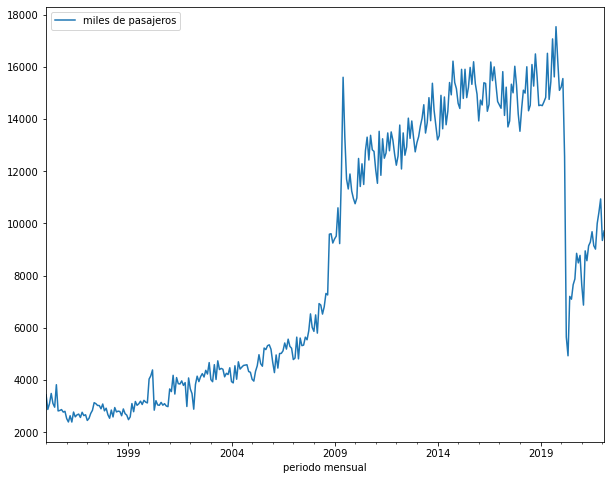

In [8]:
#Gráfica
pasajeros.plot(figsize=(10,8));

>***INTERPRETACIÓN***

Se cuentan con 326 datos/períodos, el minímo de personas que se tiene regristrado es de 2,397 y el máximo de 17,538 personas. Con una media de 8,484 y desviación estándar de 4,991. 

Se puede observar una tendencia creciente y de forma repetitiva entre 2010 y 2014, en los siguientes años se puede notar que esta tendencia permanece hasta 2019, donde se ve una gran disminución por el efecto de la pandemia del Covid-19, para mediadios del 2020 empieza a incrementar.

>***PROMEDIO MÓVIL SIMPLE  (3-6 meses):***

In [9]:
#Promedio movil 3-6 meses

pasajeros['PMS-3meses'] = pasajeros['miles de pasajeros'].rolling(window=3).mean()
pasajeros['PMS-6meses'] = pasajeros['miles de pasajeros'].rolling(window=6).mean()

In [10]:
pasajeros.head(15)

,miles de pasajeros,PMS-3meses,PMS-6meses
periodo mensual,,,
1995-01-01,3439.0,NaN,NaN
1995-02-01,2879.0,NaN,NaN
1995-03-01,3103.0,3140.333333,NaN
1995-04-01,3491.0,3157.666667,NaN
1995-05-01,3109.0,3234.333333,NaN
1995-06-01,2966.0,3188.666667,3164.500000
1995-07-01,3826.0,3300.333333,3229.000000
1995-08-01,2822.0,3204.666667,3219.500000
1995-09-01,2840.0,3162.666667,3175.666667


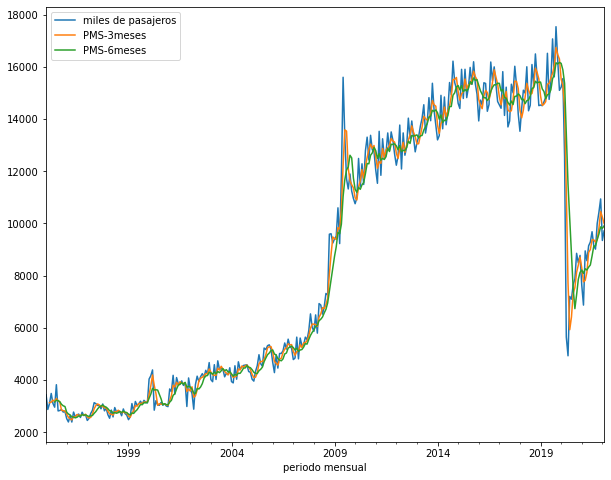

In [11]:
pasajeros.plot(figsize=(10,8));

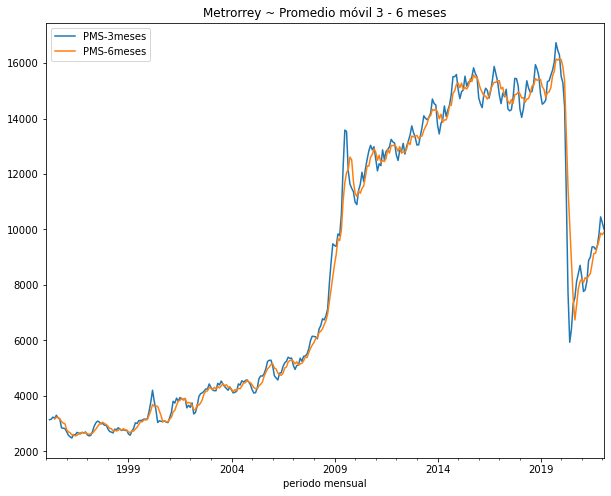

In [12]:
#Grafica
pasajeros[[ 'PMS-3meses', 'PMS-6meses']].plot(figsize=(10,8))
plt.title('Metrorrey ~ Promedio móvil 3 - 6 meses')
plt.show()

>***DESCOMPOSICIÓN ESTACIONAL:***

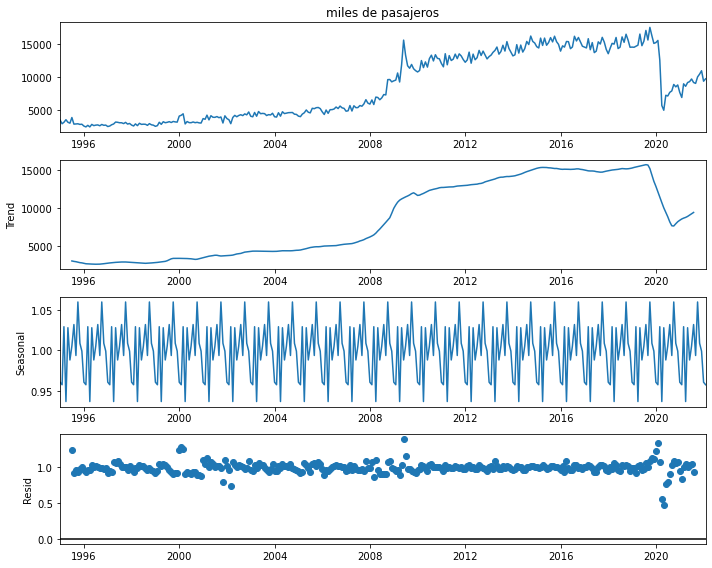

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(pasajeros['miles de pasajeros'], model='multiplicative')
result.plot();

In [14]:
#Serie desestacionalizada
#Obtener el componente estacional, con .seasonal del objeto result
componente_estacional = result.seasonal
pasajeros['desestacionalizado'] = pasajeros['miles de pasajeros'] / componente_estacional

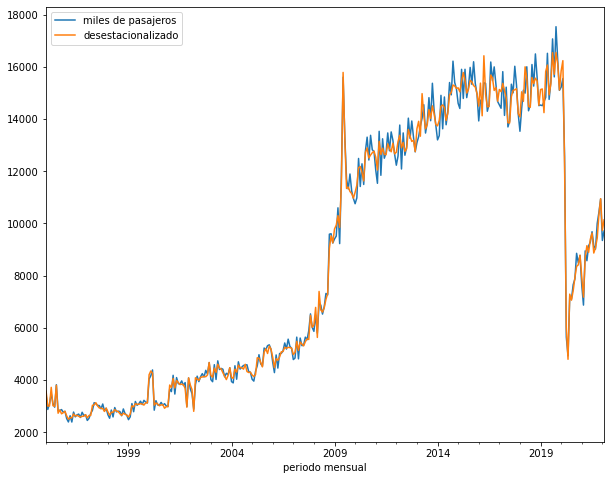

In [15]:
#Grafica
pasajeros[['miles de pasajeros','desestacionalizado']].plot(figsize=(10,8));

>***MODELO ARIMA con SERIE DESASTACIONALIZADA***

In [16]:
ic = {}
for ar in range(5):
    for ma in range(5):
        print(f"AR: {ar}, MA: {ma}")
        modelo = ARIMA(pasajeros['desestacionalizado'], order=(ar, 0, ma))
        resultado = modelo.fit()
        ic[(ar, ma)] = [resultado.aic, resultado.bic]

ic = pd.DataFrame(ic, index=["AIC", "BIC"]).T
ic.index = ic.index.set_names(["AR", "MA"])
ic

AR: 0, MA: 0
AR: 0, MA: 1
AR: 0, MA: 2
AR: 0, MA: 3
AR: 0, MA: 4
AR: 1, MA: 0
AR: 1, MA: 1
AR: 1, MA: 2
AR: 1, MA: 3
AR: 1, MA: 4
AR: 2, MA: 0
AR: 2, MA: 1
AR: 2, MA: 2
AR: 2, MA: 3
AR: 2, MA: 4
AR: 3, MA: 0
AR: 3, MA: 1
AR: 3, MA: 2
AR: 3, MA: 3
AR: 3, MA: 4
AR: 4, MA: 0
AR: 4, MA: 1
AR: 4, MA: 2
AR: 4, MA: 3
AR: 4, MA: 4


AIC          BIC
AR MA                          
0  0   6478.597973  6486.171768
   1   6083.421517  6094.782209
   2   5940.303326  5955.450916
   3   5674.185096  5693.119582
   4   5782.923160  5805.644544
1  0   5231.226267  5242.586959
   1   5232.903494  5248.051084
   2   5220.127770  5239.062257
   3   5221.840267  5244.561651
   4   5223.541209  5250.049490
2  0   5233.039739  5248.187329
   1   5230.639107  5249.573594
   2   5221.880873  5244.602258
   3   5223.309672  5249.817954
   4   5225.171390  5255.466569
3  0   5219.923964  5238.858451
   1   5221.894163  5244.615547
   2   5223.658225  5250.166507
   3   5224.883876  5255.179055
   4   5222.549758  5256.631834
4  0   5221.906837  5244.628222
   1   5223.916834  5250.425115
   2   5225.885852  5256.181031
   3   5224.108681  5258.190757
   4   5224.627379  5262.496352

In [17]:
ic.sort_values('BIC', ascending = True)

AIC          BIC
AR MA                          
3  0   5219.923964  5238.858451
1  2   5220.127770  5239.062257
   0   5231.226267  5242.586959
   3   5221.840267  5244.561651
2  2   5221.880873  5244.602258
3  1   5221.894163  5244.615547
4  0   5221.906837  5244.628222
1  1   5232.903494  5248.051084
2  0   5233.039739  5248.187329
   1   5230.639107  5249.573594
   3   5223.309672  5249.817954
1  4   5223.541209  5250.049490
3  2   5223.658225  5250.166507
4  1   5223.916834  5250.425115
3  3   5224.883876  5255.179055
2  4   5225.171390  5255.466569
4  2   5225.885852  5256.181031
3  4   5222.549758  5256.631834
4  3   5224.108681  5258.190757
   4   5224.627379  5262.496352
0  3   5674.185096  5693.119582
   4   5782.923160  5805.644544
   2   5940.303326  5955.450916
   1   6083.421517  6094.782209
   0   6478.597973  6486.171768

In [18]:
ic.sort_values('AIC', ascending = True)

AIC          BIC
AR MA                          
3  0   5219.923964  5238.858451
1  2   5220.127770  5239.062257
   3   5221.840267  5244.561651
2  2   5221.880873  5244.602258
3  1   5221.894163  5244.615547
4  0   5221.906837  5244.628222
3  4   5222.549758  5256.631834
2  3   5223.309672  5249.817954
1  4   5223.541209  5250.049490
3  2   5223.658225  5250.166507
4  1   5223.916834  5250.425115
   3   5224.108681  5258.190757
   4   5224.627379  5262.496352
3  3   5224.883876  5255.179055
2  4   5225.171390  5255.466569
4  2   5225.885852  5256.181031
2  1   5230.639107  5249.573594
1  0   5231.226267  5242.586959
   1   5232.903494  5248.051084
2  0   5233.039739  5248.187329
0  3   5674.185096  5693.119582
   4   5782.923160  5805.644544
   2   5940.303326  5955.450916
   1   6083.421517  6094.782209
   0   6478.597973  6486.171768

> **Mejor criterio de Akaike (AIC): *ARMA(3,0)***

> **Mejor criterio Bayesiano de Información (BIC) : *ARMA(3,0)***

In [19]:
#Estimamos un ARMA (3,0)
modelo = ARIMA(pasajeros['desestacionalizado'], order=(3, 0, 0))
resultado1 = modelo.fit()
resultado1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:     desestacionalizado   No. Observations:                  326
Model:                 ARIMA(3, 0, 0)   Log Likelihood               -2604.962
Date:                Mon, 23 May 2022   AIC                           5219.924
Time:                        22:18:27   BIC                           5238.858
Sample:                    01-01-1995   HQIC                          5227.480
                         - 02-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       8485.0549   3428.581      2.475      0.013    1765.159    1.52e+04
ar.L1          1.0176      0.024     41.977      0.000       0.970       1.065
ar.L2         -0.2410      0.051     -4.693      0.000      -0.342      -0.140
ar.L3          0.2136      0.039      5.412      0.000       0.136       0.291
sigma2      5.064e+05   1.78e+04     28.428      0.000    4.71e+05    5.41e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              5903.18
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               7.34   Skew:                            -1.47
Prob(H) (two-sided):                  0.00   Kurtosis:                        23.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [20]:
#Estimamos un ARIMA (3,1,0)
modelo2 = ARIMA(pasajeros['desestacionalizado'], order=(3, 1, 0))
resultado2 = modelo2.fit()
resultado2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:     desestacionalizado   No. Observations:                  326
Model:                 ARIMA(3, 1, 0)   Log Likelihood               -2595.936
Date:                Mon, 23 May 2022   AIC                           5199.872
Time:                        22:18:31   BIC                           5215.008
Sample:                    01-01-1995   HQIC                          5205.913
                         - 02-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0172      0.026      0.673      0.501      -0.033       0.067
ar.L2         -0.2163      0.040     -5.469      0.000      -0.294      -0.139
ar.L3         -0.0076      0.054     -0.140      0.889      -0.113       0.098
sigma2      5.096e+05   1.73e+04     29.473      0.000    4.76e+05    5.44e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              6337.96
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               7.78   Skew:                            -1.63
Prob(H) (two-sided):                  0.00   Kurtosis:                        24.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

>**PRUEBA RAÍZ UNITARIA**

In [21]:
#Prueba de dickey fuller aumentada ADF
adf = adfuller(pasajeros['miles de pasajeros'])

#P-value
print('p-value: %f' % adf[1])

p-value: 0.594802


In [22]:
if adf[1] < 0.05:
    
    print(f'Con un un p-value={adf[1].round(3)}\nSe rechaza hipótesis nula, serie estacionaria') 
    
else:
    
    print(f'Con un un p-value = {adf[1].round(3)}\nNO se rechaza hipótesis nula, serie no estacionaria')

Con un un p-value = 0.595
NO se rechaza hipótesis nula, serie no estacionaria


In [23]:
pasajeros_diff = pasajeros['miles de pasajeros'] - pasajeros['miles de pasajeros'].shift()

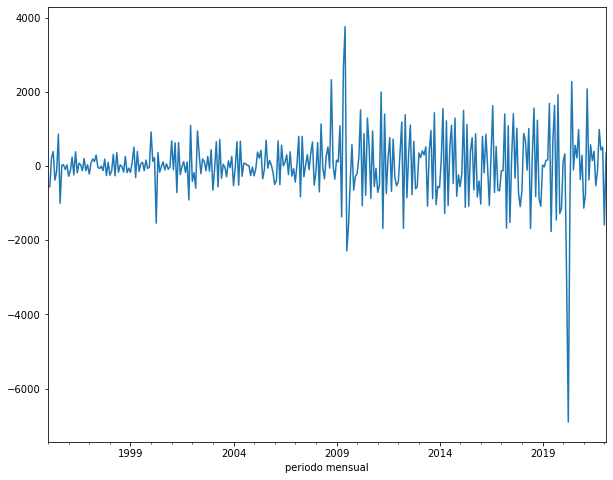

In [25]:
#Grafica diferenciado
pasajeros_diff.plot()
plt.show()

In [26]:
#Eliminamos los Nan
pasajeros_diff = pasajeros_diff.dropna()

In [27]:
#Removemos la fecha
pasajeros_diff = pasajeros_diff.reset_index()

#Eliminamos columna fecha
pasajeros_diff = pasajeros_diff.drop(['periodo mensual'], axis=1)

In [28]:
pasajeros_diff

,miles de pasajeros
0,-560.000
1,224.000
2,388.000
3,-382.000
4,-143.000
...,...
320,981.795
321,429.843
322,509.594
323,-1590.059


In [29]:
adf1 = adfuller(pasajeros_diff)
if adf1[1] < 0.05:
    
    print(f'Con un un p-value= {adf1[1]}\nSe rechaza hipótesis nula, serie estacionaria') 
    
else:
    
    print(f'Con un un p-value = {adf1[1]}\nNO se rechaza hipótesis nula, serie no estacionaria') 

Con un un p-value= 0.000527982011751093
Se rechaza hipótesis nula, serie estacionaria


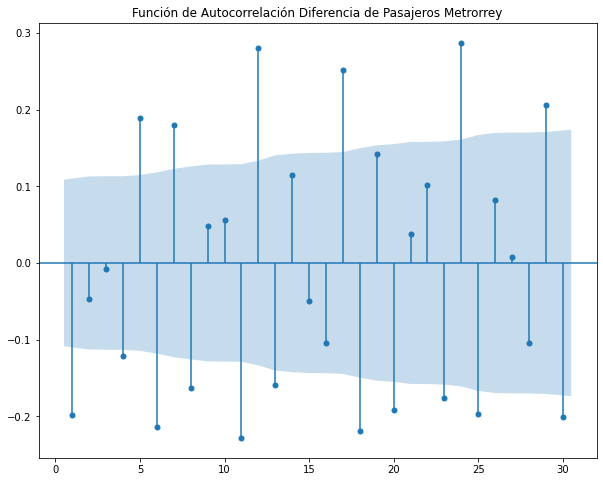

In [30]:
#Grafica de autocorrelación ACF
plot_acf(pasajeros_diff, zero=False, lags=30)
plt.title('Función de Autocorrelación Diferencia de Pasajeros Metrorrey')
plt.show()

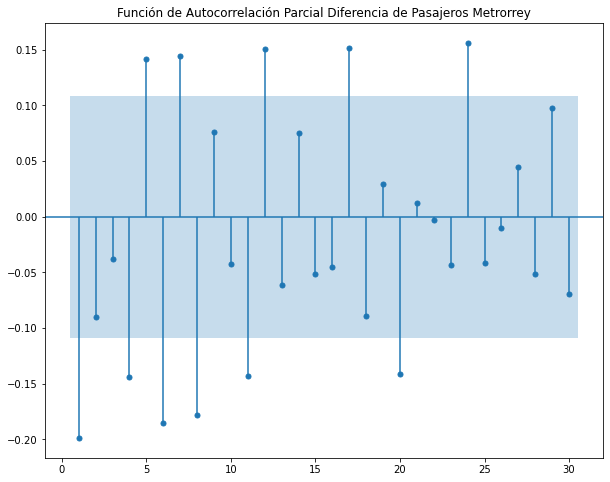

In [31]:
#Grafica de autocorrelación parcial PACF
plot_pacf(pasajeros_diff, zero=False, lags=30)
plt.title('Función de Autocorrelación Parcial Diferencia de Pasajeros Metrorrey')
plt.show()

>**INTERPRETACIÓN**

En la gráfica de ACF observamos que su intervalo va en aumento y tiene sentido por su forma en la que se presentan los datos en ciertos periodos, nos muestra sus rezagos y con ello el valor de autocorrelación. 

En PACF nos muestra la derivada o pendiente de la ACF y nos indica la correlación parcial entre los intervalos, en esta vemos ya mas variedad de cambios en los datos.

> **¿AR(p), MA(q), ARMA(p,q)?**

Observando las gráficas se puede decir que se puede tratar de un modelo ARMA, pues se tiene variaciones en los rezagos e intervalos de confianza.

>***Modelo ARMA escogido: (1,1)***

In [33]:
#Estimamos un ARMA (1,1)
modelo = ARIMA(pasajeros_diff, order=(1, 0, 1))
resultado = modelo.fit()
resultado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:     miles de pasajeros   No. Observations:                  325
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -2654.128
Date:                Mon, 23 May 2022   AIC                           5316.257
Time:                        22:43:16   BIC                           5331.392
Sample:                             0   HQIC                          5322.297
                                - 325                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.3049     33.719      0.573      0.567     -46.783      85.393
ar.L1          0.3882      0.189      2.054      0.040       0.018       0.759
ma.L1         -0.6064      0.171     -3.539      0.000      -0.942      -0.271
sigma2      7.368e+05   2.53e+04     29.087      0.000    6.87e+05    7.86e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              5881.41
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):              11.21   Skew:                            -1.78
Prob(H) (two-sided):                  0.00   Kurtosis:                        23.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

>***Otros 3 modelos:***

In [34]:
#1-Estimamos un ARMA (1,0)
modelo = ARIMA(pasajeros_diff, order=(1, 0, 0))
resultado1 = modelo.fit()
resultado1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:     miles de pasajeros   No. Observations:                  325
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -2656.477
Date:                Mon, 23 May 2022   AIC                           5318.953
Time:                        22:43:21   BIC                           5330.305
Sample:                             0   HQIC                          5323.483
                                - 325                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.3047     42.680      0.452      0.651     -64.347     102.957
ar.L1         -0.1979      0.035     -5.585      0.000      -0.267      -0.128
sigma2      7.377e+05   2.77e+04     26.614      0.000    6.83e+05    7.92e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):              5101.61
Prob(Q):                              0.74   Prob(JB):                         0.00
Heteroskedasticity (H):              11.28   Skew:                            -1.63
Prob(H) (two-sided):                  0.00   Kurtosis:                        22.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [35]:
#2-Estimamos un ARMA (2,5)
modelo = ARIMA(pasajeros_diff, order=(2, 0, 5))
resultado2 = modelo.fit()
resultado2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:     miles de pasajeros   No. Observations:                  325
Model:                 ARIMA(2, 0, 5)   Log Likelihood               -2616.997
Date:                Mon, 23 May 2022   AIC                           5251.994
Time:                        22:43:27   BIC                           5286.049
Sample:                             0   HQIC                          5265.586
                                - 325                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.3125     41.404      0.466      0.641     -61.837     100.462
ar.L1         -1.7237      0.006   -282.998      0.000      -1.736      -1.712
ar.L2         -0.9942      0.007   -140.960      0.000      -1.008      -0.980
ma.L1          1.7245      0.036     47.482      0.000       1.653       1.796
ma.L2          0.7603      0.063     12.037      0.000       0.637       0.884
ma.L3         -0.4223      0.092     -4.571      0.000      -0.603      -0.241
ma.L4         -0.2440      0.115     -2.118      0.034      -0.470      -0.018
ma.L5          0.0249      0.066      0.377      0.706      -0.105       0.154
sigma2      6.671e+05   3.44e+04     19.380      0.000       6e+05    7.35e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3232.76
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               7.88   Skew:                            -1.46
Prob(H) (two-sided):                  0.00   Kurtosis:                        18.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [36]:
#3-Estimamos un ARIMA (2,3,1)
modelo = ARIMA(pasajeros_diff, order=(2,3,1))
resultado3 = modelo.fit()
resultado3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:     miles de pasajeros   No. Observations:                  325
Model:                 ARIMA(2, 3, 1)   Log Likelihood               -2797.405
Date:                Mon, 23 May 2022   AIC                           5602.810
Time:                        22:43:30   BIC                           5617.908
Sample:                             0   HQIC                          5608.838
                                - 325                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0924      0.024    -45.689      0.000      -1.139      -1.046
ar.L2         -0.5694      0.025    -22.455      0.000      -0.619      -0.520
ma.L1         -1.0000      0.048    -20.637      0.000      -1.095      -0.905
sigma2      2.025e+06   2.39e-08   8.46e+13      0.000    2.03e+06    2.03e+06
===================================================================================
Ljung-Box (L1) (Q):                   9.55   Jarque-Bera (JB):               506.07
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               9.02   Skew:                             0.30
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.23e+28. Standard errors may be unstable.
"""

In [37]:
ic = {}
for ar in range(5):
    for ma in range(5):
        print(f"AR: {ar}, MA: {ma}")
        modelo = ARIMA(pasajeros_diff, order=(ar, 0, ma))
        result = modelo.fit()
        ic[(ar, ma)] = [result.aic, result.bic]

ic = pd.DataFrame(ic, index=["AIC", "BIC"]).T
ic.index = ic.index.set_names(["AR", "MA"])
ic

AR: 0, MA: 0
AR: 0, MA: 1
AR: 0, MA: 2
AR: 0, MA: 3
AR: 0, MA: 4
AR: 1, MA: 0
AR: 1, MA: 1
AR: 1, MA: 2
AR: 1, MA: 3
AR: 1, MA: 4
AR: 2, MA: 0
AR: 2, MA: 1
AR: 2, MA: 2
AR: 2, MA: 3
AR: 2, MA: 4
AR: 3, MA: 0
AR: 3, MA: 1
AR: 3, MA: 2
AR: 3, MA: 3
AR: 3, MA: 4
AR: 4, MA: 0
AR: 4, MA: 1
AR: 4, MA: 2
AR: 4, MA: 3
AR: 4, MA: 4


AIC          BIC
AR MA                          
0  0   5329.957574  5337.525224
   1   5316.579782  5327.931257
   2   5317.038700  5332.174001
   3   5318.733072  5337.652198
   4   5316.213121  5338.916072
1  0   5318.953063  5330.304539
   1   5316.256888  5331.392189
   2   5317.703727  5336.622853
   3   5319.694292  5342.397243
   4   5304.024957  5330.511734
2  0   5318.358025  5333.493325
   1   5317.775708  5336.694834
   2   5268.351844  5291.054795
   3   5317.678148  5344.164924
   4   5250.584010  5280.854611
3  0   5319.914104  5338.833230
   1   5319.727529  5342.430480
   2   5306.784116  5333.270892
   3   5270.024237  5300.294838
   4   5253.274041  5287.328467
4  0   5315.276243  5337.979194
   1   5295.098338  5321.585114
   2   5254.573341  5284.843943
   3   5254.574612  5288.629039
   4   5271.687889  5309.526141

In [39]:
ic.sort_values('BIC', ascending = True)

AIC          BIC
AR MA                          
2  4   5250.584010  5280.854611
4  2   5254.573341  5284.843943
3  4   5253.274041  5287.328467
4  3   5254.574612  5288.629039
2  2   5268.351844  5291.054795
3  3   5270.024237  5300.294838
4  4   5271.687889  5309.526141
   1   5295.098338  5321.585114
0  1   5316.579782  5327.931257
1  0   5318.953063  5330.304539
   4   5304.024957  5330.511734
   1   5316.256888  5331.392189
0  2   5317.038700  5332.174001
3  2   5306.784116  5333.270892
2  0   5318.358025  5333.493325
1  2   5317.703727  5336.622853
2  1   5317.775708  5336.694834
0  0   5329.957574  5337.525224
   3   5318.733072  5337.652198
4  0   5315.276243  5337.979194
3  0   5319.914104  5338.833230
0  4   5316.213121  5338.916072
1  3   5319.694292  5342.397243
3  1   5319.727529  5342.430480
2  3   5317.678148  5344.164924

In [41]:
ic.sort_values('AIC', ascending = True)

AIC          BIC
AR MA                          
2  4   5250.584010  5280.854611
3  4   5253.274041  5287.328467
4  2   5254.573341  5284.843943
   3   5254.574612  5288.629039
2  2   5268.351844  5291.054795
3  3   5270.024237  5300.294838
4  4   5271.687889  5309.526141
   1   5295.098338  5321.585114
1  4   5304.024957  5330.511734
3  2   5306.784116  5333.270892
4  0   5315.276243  5337.979194
0  4   5316.213121  5338.916072
1  1   5316.256888  5331.392189
0  1   5316.579782  5327.931257
   2   5317.038700  5332.174001
2  3   5317.678148  5344.164924
1  2   5317.703727  5336.622853
2  1   5317.775708  5336.694834
   0   5318.358025  5333.493325
0  3   5318.733072  5337.652198
1  0   5318.953063  5330.304539
   3   5319.694292  5342.397243
3  1   5319.727529  5342.430480
   0   5319.914104  5338.833230
0  0   5329.957574  5337.525224

>***¿Qué modelo se debería estimar según AIC?***

Modelo ARMA(2,4)

>***¿Qué modelo se debería estimar según BIC?***

Modelo ARMA(2,4)

In [42]:
#Modelo ARMA escogido -> (2,4)
modelo = ARIMA(pasajeros_diff, order=(2, 0, 4))
result1 = modelo.fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:     miles de pasajeros   No. Observations:                  325
Model:                 ARIMA(2, 0, 4)   Log Likelihood               -2617.292
Date:                Mon, 23 May 2022   AIC                           5250.584
Time:                        22:51:18   BIC                           5280.855
Sample:                             0   HQIC                          5262.665
                                - 325                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.3274     40.511      0.477      0.633     -60.072      98.727
ar.L1         -1.7254      0.006   -279.914      0.000      -1.737      -1.713
ar.L2         -0.9956      0.007   -142.621      0.000      -1.009      -0.982
ma.L1          1.7300      0.037     46.785      0.000       1.658       1.802
ma.L2          0.7661      0.063     12.248      0.000       0.644       0.889
ma.L3         -0.4409      0.079     -5.587      0.000      -0.596      -0.286
ma.L4         -0.2843      0.050     -5.722      0.000      -0.382      -0.187
sigma2      6.721e+05   3.49e+04     19.251      0.000    6.04e+05    7.41e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              3147.69
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               7.96   Skew:                            -1.45
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [45]:
#Calculo de MAPE, MAD, MSD para ARMA(2,4)
pasajeros_diff['pronostico_1'] = result1.predict()

mape1 = 0
mad1 = 0
msd1 = 0
for x in range(1,325): 
    mape1 = mape1 + abs(((pasajeros_diff.at[x,'miles de pasajeros'] - pasajeros_diff.at[x,'pronostico_1'])/pasajeros_diff.at[x,'miles de pasajeros']))
    mad1 = mad1 + abs((pasajeros_diff.at[x,'miles de pasajeros'] - pasajeros_diff.at[x,'pronostico_1']))
    msd1 = msd1 + abs((pasajeros_diff.at[x,'miles de pasajeros'] - pasajeros_diff.at[x,'pronostico_1'])**2)
    
mape1 = mape1 / 325
mad1 = mad1 / 325
msd1 = msd1 / 325
        
print(f'El valor MAPE del modelo ARMA(2,4): {mape1}')
print(f'El valor MAD del modelo ARMA(2,4): {mad1}')
print(f'El valor MSD del modelo ARMA(2,4): {msd1}')

El valor MAPE del modelo ARMA(2,4): 1.84265760784544
El valor MAD del modelo ARMA(2,4): 474.4632551862846
El valor MSD del modelo ARMA(2,4): 563833.3157704384


In [46]:
#Calculo de MAPE, MAD, MSD para ARMA(1,1)
pasajeros_diff['pronostico_2'] = resultado1.predict()

mape1 = 0
mad1 = 0
msd1 = 0
for x in range(1,325): 
    mape1 = mape1 + abs(((pasajeros_diff.at[x,'miles de pasajeros'] - pasajeros_diff.at[x,'pronostico_2'])/pasajeros_diff.at[x,'miles de pasajeros']))
    mad1 = mad1 + abs((pasajeros_diff.at[x,'miles de pasajeros'] - pasajeros_diff.at[x,'pronostico_2']))
    msd1 = msd1 + abs((pasajeros_diff.at[x,'miles de pasajeros'] - pasajeros_diff.at[x,'pronostico_2'])**2)
    
mape1 = mape1 / 325
mad1 = mad1 / 325
msd1 = msd1 / 325
        
print(f'El valor MAPE del modelo ARMA(1,1): {mape1}')
print(f'El valor MAD del modelo ARMA(1,1): {mad1}')
print(f'El valor MSD del modelo ARMA(1,1): {msd1}')

El valor MAPE del modelo ARMA(1,1): 1.2785942695496866
El valor MAD del modelo ARMA(1,1): 547.0995039365768
El valor MSD del modelo ARMA(1,1): 735420.8412953855


>***¿Qué modelo se debe estimar según la medida elegida (MAPE, MAD, MSD)?***

Modelo ARMA(2,4)

>***PRONÓSTICOS***

In [66]:
ic = {}
for ar in range(7):
    for ma in range(7):
        print(f"AR: {ar}, MA: {ma}")
        modelo = ARIMA(pasajeros['miles de pasajeros'], order=(ar, 0, ma))
        resultadoP = modelo.fit()
        ic[(ar, ma)] = [resultadoP.aic, resultadoP.bic]

ic = pd.DataFrame(ic, index=["AIC", "BIC"]).T
ic.index = ic.index.set_names(["AR", "MA"])
ic

AR: 0, MA: 0
AR: 0, MA: 1
AR: 0, MA: 2
AR: 0, MA: 3
AR: 0, MA: 4
AR: 0, MA: 5
AR: 0, MA: 6
AR: 1, MA: 0
AR: 1, MA: 1
AR: 1, MA: 2
AR: 1, MA: 3
AR: 1, MA: 4
AR: 1, MA: 5
AR: 1, MA: 6
AR: 2, MA: 0
AR: 2, MA: 1
AR: 2, MA: 2
AR: 2, MA: 3
AR: 2, MA: 4
AR: 2, MA: 5
AR: 2, MA: 6
AR: 3, MA: 0
AR: 3, MA: 1
AR: 3, MA: 2
AR: 3, MA: 3
AR: 3, MA: 4
AR: 3, MA: 5
AR: 3, MA: 6
AR: 4, MA: 0
AR: 4, MA: 1
AR: 4, MA: 2
AR: 4, MA: 3
AR: 4, MA: 4
AR: 4, MA: 5
AR: 4, MA: 6
AR: 5, MA: 0
AR: 5, MA: 1
AR: 5, MA: 2
AR: 5, MA: 3
AR: 5, MA: 4
AR: 5, MA: 5
AR: 5, MA: 6
AR: 6, MA: 0
AR: 6, MA: 1
AR: 6, MA: 2
AR: 6, MA: 3
AR: 6, MA: 4
AR: 6, MA: 5
AR: 6, MA: 6


AIC          BIC
AR MA                          
0  0   6480.178115  6487.751910
   1   6089.629321  6100.990013
   2   5885.723654  5900.871243
   3   5885.294963  5904.229450
   4   5726.205613  5748.926997
   5   5573.051451  5599.559733
   6   5819.541025  5849.836204
1  0   5348.991097  5360.351789
   1   5336.849943  5351.997533
   2   5337.549235  5356.483722
   3   5339.372046  5362.093430
   4   5336.544061  5363.052343
   5   5330.693909  5360.989088
   6   5325.355846  5359.437922
2  0   5338.896993  5354.044583
   1   5337.030109  5355.964596
   2   5326.928294  5349.649679
   3   5328.826932  5355.335214
   4   5325.021514  5355.316693
   5   5324.968741  5359.050818
   6   5333.056114  5370.925088
3  0   5338.633070  5357.567557
   1   5325.558499  5348.279883
   2   5292.849413  5319.357695
   3   5297.155885  5327.451064
   4   5271.462736  5305.544812
   5   5272.535406  5310.404380
   6   5275.263101  5316.918973
4  0   5340.307187  5363.028572
   1   5327.064846  5353.573128
   2   5298.261940  5328.557119
   3   5287.937945  5322.020022
   4   5327.886093  5365.755067
   5   5330.207893  5371.863765
   6   5276.500592  5321.943360
5  0   5336.110769  5362.619050
   1   5315.836653  5346.131832
   2   5281.214099  5315.296176
   3   5286.310102  5324.179076
   4   5289.338288  5330.994159
   5   5293.799392  5339.242161
   6   5278.514003  5327.743669
6  0   5331.273244  5361.568423
   1   5314.637170  5348.719247
   2   5284.476431  5322.345405
   3   5278.029128  5319.684999
   4   5279.198716  5324.641484
   5   5290.450878  5339.680544
   6   5284.407320  5337.423884

In [67]:
ic.sort_values('BIC', ascending = True)

AIC          BIC
AR MA                          
3  4   5271.462736  5305.544812
   5   5272.535406  5310.404380
5  2   5281.214099  5315.296176
3  6   5275.263101  5316.918973
   2   5292.849413  5319.357695
6  3   5278.029128  5319.684999
4  6   5276.500592  5321.943360
   3   5287.937945  5322.020022
6  2   5284.476431  5322.345405
5  3   5286.310102  5324.179076
6  4   5279.198716  5324.641484
3  3   5297.155885  5327.451064
5  6   5278.514003  5327.743669
4  2   5298.261940  5328.557119
5  4   5289.338288  5330.994159
6  6   5284.407320  5337.423884
5  5   5293.799392  5339.242161
6  5   5290.450878  5339.680544
5  1   5315.836653  5346.131832
3  1   5325.558499  5348.279883
6  1   5314.637170  5348.719247
2  2   5326.928294  5349.649679
1  1   5336.849943  5351.997533
4  1   5327.064846  5353.573128
2  0   5338.896993  5354.044583
   4   5325.021514  5355.316693
   3   5328.826932  5355.335214
   1   5337.030109  5355.964596
1  2   5337.549235  5356.483722
3  0   5338.633070  5357.567557
2  5   5324.968741  5359.050818
1  6   5325.355846  5359.437922
   0   5348.991097  5360.351789
   5   5330.693909  5360.989088
6  0   5331.273244  5361.568423
1  3   5339.372046  5362.093430
5  0   5336.110769  5362.619050
4  0   5340.307187  5363.028572
1  4   5336.544061  5363.052343
4  4   5327.886093  5365.755067
2  6   5333.056114  5370.925088
4  5   5330.207893  5371.863765
0  5   5573.051451  5599.559733
   4   5726.205613  5748.926997
   6   5819.541025  5849.836204
   2   5885.723654  5900.871243
   3   5885.294963  5904.229450
   1   6089.629321  6100.990013
   0   6480.178115  6487.751910

In [68]:
ic.sort_values('AIC', ascending = True)

AIC          BIC
AR MA                          
3  4   5271.462736  5305.544812
   5   5272.535406  5310.404380
   6   5275.263101  5316.918973
4  6   5276.500592  5321.943360
6  3   5278.029128  5319.684999
5  6   5278.514003  5327.743669
6  4   5279.198716  5324.641484
5  2   5281.214099  5315.296176
6  6   5284.407320  5337.423884
   2   5284.476431  5322.345405
5  3   5286.310102  5324.179076
4  3   5287.937945  5322.020022
5  4   5289.338288  5330.994159
6  5   5290.450878  5339.680544
3  2   5292.849413  5319.357695
5  5   5293.799392  5339.242161
3  3   5297.155885  5327.451064
4  2   5298.261940  5328.557119
6  1   5314.637170  5348.719247
5  1   5315.836653  5346.131832
2  5   5324.968741  5359.050818
   4   5325.021514  5355.316693
1  6   5325.355846  5359.437922
3  1   5325.558499  5348.279883
2  2   5326.928294  5349.649679
4  1   5327.064846  5353.573128
   4   5327.886093  5365.755067
2  3   5328.826932  5355.335214
4  5   5330.207893  5371.863765
1  5   5330.693909  5360.989088
6  0   5331.273244  5361.568423
2  6   5333.056114  5370.925088
5  0   5336.110769  5362.619050
1  4   5336.544061  5363.052343
   1   5336.849943  5351.997533
2  1   5337.030109  5355.964596
1  2   5337.549235  5356.483722
3  0   5338.633070  5357.567557
2  0   5338.896993  5354.044583
1  3   5339.372046  5362.093430
4  0   5340.307187  5363.028572
1  0   5348.991097  5360.351789
0  5   5573.051451  5599.559733
   4   5726.205613  5748.926997
   6   5819.541025  5849.836204
   3   5885.294963  5904.229450
   2   5885.723654  5900.871243
   1   6089.629321  6100.990013
   0   6480.178115  6487.751910

In [70]:
#Modelo ARMA escogido -> (3,4)
modelo = ARIMA(pasajeros['miles de pasajeros'], order=(3, 0, 4))
resultadoPP = modelo.fit()
resultadoPP.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:     miles de pasajeros   No. Observations:                  326
Model:                 ARIMA(3, 0, 4)   Log Likelihood               -2626.731
Date:                Tue, 24 May 2022   AIC                           5271.463
Time:                        00:38:25   BIC                           5305.545
Sample:                    01-01-1995   HQIC                          5285.063
                         - 02-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       8483.8788   3838.684      2.210      0.027     960.196     1.6e+04
ar.L1         -0.7351      0.012    -61.470      0.000      -0.759      -0.712
ar.L2          0.7160      0.017     41.115      0.000       0.682       0.750
ar.L3          0.9893      0.011     87.133      0.000       0.967       1.012
ma.L1          1.7306      0.039     44.926      0.000       1.655       1.806
ma.L2          0.7760      0.065     11.920      0.000       0.648       0.904
ma.L3         -0.4183      0.080     -5.244      0.000      -0.575      -0.262
ma.L4         -0.2694      0.049     -5.453      0.000      -0.366      -0.173
sigma2      6.659e+05   3.72e+04     17.896      0.000    5.93e+05    7.39e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2937.02
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               7.52   Skew:                            -1.30
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [71]:
pasajeros['pronosticoP'] = resultadoPP.predict()
pasajeros['pronosticoP'][0] = pasajeros['miles de pasajeros'][0]

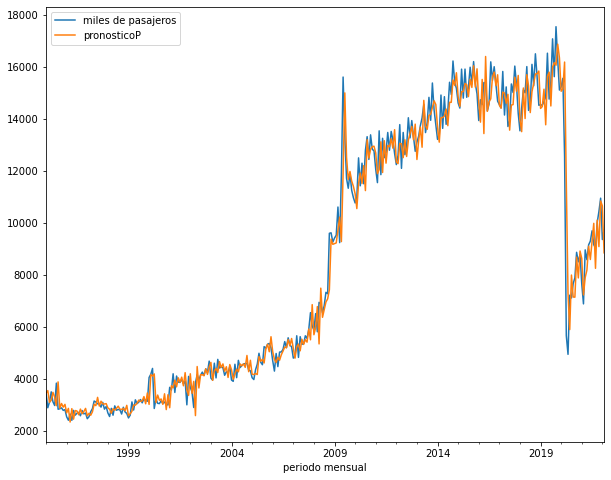

In [72]:
pasajeros[['miles de pasajeros','pronosticoP']].plot()
plt.show()

In [73]:
#Observaciones para la predicción
len(pasajeros)

326

In [74]:
#Pronostico de Marzo a Julio
resultadoP.predict(326,330)

2022-03-01    10410.896337
2022-04-01     9754.733164
2022-05-01    10556.426109
2022-06-01    10131.540177
2022-07-01     9831.116362
Freq: MS, Name: predicted_mean, dtype: float64

>***Debilidades o limitaciones de los modelos ARIMA***

1. En estos modelos se utiliza únicamente el pasado de la serie para predecir, los cuales sirven como punto de referencia.
2. Requiere que la serie sea estacionaria, de otro modo se aplica una diferenciación.
3. Son pobres para predecir en momentos de cambios estructurales.
4. Son de memoria corta y su horizonte de pronóstico es a veces muy corto.
5. Menos eficiente en el uso de la información. 